# Spectral Observations for Helium

We are tasked to determine the Rydberg constant used to derive the spectral lines for Hydrogen emission. In order to do so we shall use a Spencer Spectromoter and an emission tube in order to observe, measure and analyze the spectral lines of Helium and Hydrogen. The derivation process is as follows:
- Using the Helium spectral line measurements and assuming that the literature provided for the wavelengths of the observed helium emission is significantly accurate, determine the grating scale of the diffractive grating for which you are using in this experiment.
- Using the calculated grating scale and the Hydrogen spectral line observations determine the Rydberg constant
From elementary knowledge of optics we know that the grating scale $d$ and the observed mean angle relative from the normal of the refractive gratine $\theta$ are related to the observed wavelength $\lambda$ and order of the spectral line $m$ as:
$$m \lambda = d \sin(\theta)$$
Now we may account for the uncertainty in our measurements due to the interaction of light with the diffractive grating by adding a second order term: $\left(\frac{\sin(\Delta)}{\cos(\Delta) - \cos(\theta)}\right)^2$ where $\Delta$ is the difference in the observed angles for a diffracted spectral line.
$$m \lambda = d \left( 1 + \left(\frac{\sin(\Delta)}{\cos(\Delta) - \cos(\theta)}\right)^2\right)\sin(\theta)\\
 d = \frac{\lambda}{\left( 1 + \left(\frac{\sin(\Delta)}{\cos(\Delta) - \cos(\theta)}\right)^2\right)\sin(\theta)}$$

In order to accurately measure the wavelength of a light ray we must account for the phenomena of diffraction. The relation between the diffraction angle $\theta$ and the separation width of the diffraction grating, also known as the diffraction constant $d$ can be explained with a wave equation. Looking back at introductory optics and a section on diffraction, we may recall that by accounting for only interference, the intensity of a diffracted ray of light with wavelength $\lambda$ can be calculated as such:
$$I = I_o \frac{\sin^2(N \frac{\psi}{2})}{\sin^2(\frac{\psi}{2})}\\
\psi = \frac{2 \pi d}{\lambda}\sin(\theta)$$
where N is the number of slits contained in the diffraction grating and $d$ is the grating constant. It is helpful to look at an intensity plot such as the one below where the intensity was calculated for an incoming light ray with a wavelength of 400 nm being diffracted by a diffraction grating containing 5 slits with a slit separation of $3.38X10^{-3}$ mm. Notice that each maximum peak of the intensity plot is located at $\theta_{\text{max}} = \arcsin(\frac{m \lambda}{d}), \forall m \in \mathbb{Z}$. Note also that the collimator for the Spencer Spectrometer uses a single slit which experiences diffraction from it's aperture in order to collimate light rays to run parallel with one-another, yet in this case diffraction contributes a negligible uncertainty to observations.

The wavelength used here is 4.000e-07 m with an inital intensity of 100


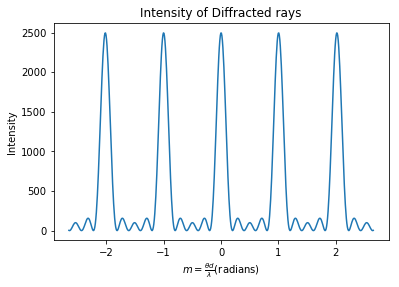

There are 5 slits in the grating seperated by 3.378e-06 m
The ratio between the wavelength and grating seperation (lambda/d) is 1.184e-01


In [9]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


b = (1/296)*(1e-3)
N = 5
I_o = 100
#waveln = np.linspace(4, 8, 80)
lm = 4e-7
print('The wavelength used here is %.3e m with an inital intensity of %s'%(lm, I_o))
sep = lm/b
dif_ang = np.linspace(-0.1*np.pi, 0.1*np.pi, 600)
#lm, thet = np.meshgrid(waveln*(1e-7), dif_ang)
#delta = (2*np.pi/lm)*np.sin(thet)*b
delta = (2*np.pi/lm)*np.sin(dif_ang)*b
#Ints = I_o * ((np.sin(N*delta/2)/(delta/2))**2)
Ints = I_o * ((np.sin(N*delta/2)/np.sin(delta/2))**2)

plt.plot(dif_ang/sep, Ints)
plt.title('Intensity of Diffracted rays')
plt.xlabel(r'$m = \frac{\theta d}{\lambda}$(radians)')
plt.ylabel('Intensity')
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.plot_wireframe(lm, thet, Ints, rstride=10, cstride=10)
plt.show()

print('There are %s slits in the grating seperated by %.3e m'%(N, b))
print('The ratio between the wavelength and grating seperation (lambda/d) is %.3e'%sep)

In [1]:
#This is where you call in the directory of where the files containing the data in the form of txt or csv are located

cd Documents

C:\Users\rey\Documents


In [2]:
import numpy as np

#open and read your text file to convert data into arrays
angles = np.loadtxt('helium_spectra_jj.txt')
rt_ang = np.empty(len(angles))
lt_ang = np.empty(len(angles))
m = np.empty(len(angles))
ref = np.empty(len(angles))

#build arrays
for s in range(len(angles)):
    rt_ang[s] = angles[s][0]
    lt_ang[s] = angles[s][1]
    m[s] = angles[s][2]
    ref[s] = angles[s][3]

#calculate the relative thetas and the delts for the second order approximation equation
#ref = np.repeat(180.0, len(angles)) + (dis/60)
th1 = abs(lt_ang - ref)
th2 = abs(ref - rt_ang)
th = 0.5*(th1 + th2)
delta = 0.5*(th1 - th2)

#convert degrees to radians
def arg(theta):
    return theta*np.pi/180

#array of known wavelengths correlated to data arrays previously built on top, note that 
#the wavelengths repeat in order to accomadate for m =2 observations
wavelnt = np.array([4026.19, 4471.97, 5015.678, 5047.74, 5411.52, 5875.97, 6678.15, 7065.19, 4026.19, 4471.97, 5015.678, 5047.74, 5411.52, 5875.97, 6678.15])

#calculate the diffraction grating constant for each observed spec line using the second order correction.
x1 = np.cos(arg(th))
x2 = np.cos(arg(delta))
y1 = np.sin(arg(th))
y2 = np.sin(arg(delta))

dif_grat = m*(wavelnt*(1E-10))/((1 + ((y2/(x2-x1))**2))*y1)


In [12]:
dif_grat

array([  2.73231208e-06,   3.05175866e-06,   3.26271709e-06,
         3.29597318e-06,   3.49039602e-06,   3.28620632e-06,
         3.34011546e-06,   3.33089760e-06,   2.77651546e-06,
         2.93847846e-06,   3.27094548e-06,   3.22998645e-06,
         3.39887594e-06,   3.27333140e-06,   3.31257016e-06])

In [3]:
#Note that this is not the weighted average
print('The differaction grating spacing is %.3e +- %.3e'%(np.mean(dif_grat), np.std(dif_grat)))

The differaction grating spacing is 3.199e-06 +- 2.150e-07


In [7]:
#read and build arrays for the hydrogen spectral line observations
h_angl = np.loadtxt('hydro_spectra_jj.txt')

rt_ang = np.empty(len(h_angl))
lt_ang = np.empty(len(h_angl))
m = np.empty(len(h_angl))
rt_ref = np.empty(len(h_angl))
lt_ref = np.empty(len(h_angl))
sig_th = np.empty(len(h_angl))

for s in range(len(h_angl)):
    rt_ang[s] = h_angl[s][0]
    lt_ang[s] = h_angl[s][1]
    m[s] = h_angl[s][2]
    rt_ref[s] = h_angl[s][3]
    lt_ref[s] = h_angl[s][4]
    sig_th[s] = h_angl[s][5]

#Second order calculation for the wavelength
th1 = abs(lt_ang - lt_ref)
th2 = abs(rt_ref - rt_ang)
th = 0.5*(th1 + th2)
delta = 0.5*(th1 - th2)
#d = np.mean(dif_grat)
d= 3.37469E-06

x1 = np.cos(arg(th))
x2 = np.cos(arg(delta))
y1 = np.sin(arg(th))
y2 = np.sin(arg(delta))
tn = x1/y1

lamb = d*((1 + ((y2/(x2-x1))**2))*y1)/m

print('All wavelength calculations: %s'%lamb)
n = np.array([5, 4, 3, 5, 4, 3])
n_trans = np.empty(len(h_angl))

for s in range(len(h_angl)):
    n_trans[s] = - (1/n[s])**2 + (1/2)**2

#Rydberg constant calculations
R = 1/(lamb * n_trans)
top_R = max(R) - np.mean(R)
bot_R = np.mean(R) - min(R)
sig_R = (m * sig_th * (1/tn) * (1/y1))/(d*n_trans)
sig_y = sig_th/(d *tn*y1)

#Weighted calculations:
weights = 1/(sig_R**2)
w_r = R*weights
a1 = sum(w_r)
a2 = sum(weights)
w_mean = a1/a2


print('All proportionality constant calculations: ',R)
print('The average Rydberg constant calculated was %.3f + %.3f - %.3f, with the weighted mean being %.3f +- %.3e'%(np.mean(R), top_R, bot_R, w_mean, a2))

All wavelength calculations: [  4.50263788e-07   4.96915713e-07   6.61852194e-07   4.35238530e-07
   4.85369220e-07   6.56143122e-07]
All proportionality constant calculations:  [ 10575811.09299145  10732873.18602842  10878561.80273448
  10940908.09617697  10988198.49038946  10973215.68578285]
The average Rydberg constant calculated was 10848261.392 + 139937.098 - 272450.299, with the weighted mean being 10943290.376 +- 7.426e-09


It is also possible to use the linear relation of the measured wavelength and energy levels with the following equation:
$$\frac{1}{m\lambda} = R_H\frac{\left(\frac{1}{4} - \frac{1}{n^2}\right)}{m}$$
in order to estimate the rydberg constant using a linear fit program to calculate the constant as a slope.

x data points: [ 0.21        0.1875      0.13888889  0.105       0.09375     0.06944444]
y data points: [ 2303316.27163451  2036490.84585152  1512274.82017271  1150527.73279742
  1030192.05347482   762039.20036419]
y-error data points: [ 10790.23873741  11437.77063863  10912.10494822  37510.84203307
   3938.45731763    893.43555225]
results
slope = 10902068.609 +/- 54071.941
intercept = 5046.414 +/- 4021.277
Part (b) complete

Part (c) we shall plot our results


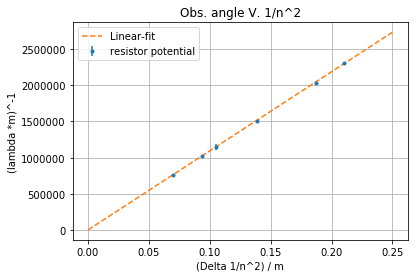

Problem 2 complete


In [15]:
#Expectation value of the nth-power of the x-array weighted by the inverse of the y-variance
def u(x, sig, n):
    tp = x**n
    bt = sig**2
    ary = tp/bt
    return np.sum(ary)

#Expectation value of the inner product between the the nth-power of the x-array and the y-array weighted by the inverse of the y-variance
def w(x, y, sig, n):
    tp = y*(x**n)
    bt = sig**2
    ary = tp/bt
    return np.sum(ary)
    
#Linear-fit algorithm using least-squares method
def linfit(x_data, y_data, y_error):
    u_0 = u(x_data, y_error, 0)
    u_1 = u(x_data, y_error, 1)
    u_2 = u(x_data, y_error, 2)
    
    w_0 = w(x_data, y_data, y_error, 0)
    w_1 = w(x_data, y_data, y_error, 1)
    w_2 = w(x_data, y_data, y_error, 2)
    
    D = (u_0 * u_2) - (u_1 ** 2)
    stnd_1 = (u_0 * w_1) - (w_0 * u_1)
    stnd_2 = (u_2 * w_0) - (w_1 * u_1)
    
    slope = stnd_1/D
    var_sl = u_0/D
    
    y_intr = stnd_2/D
    var_yt = u_2/D
    
    return np.array([slope, y_intr, var_sl, var_yt])

#the linear relation between lambda and the energy levels
x = n_trans/m
y = 1/(d*y1)
yerr = sig_y

print('x data points: %s'%x)
print('y data points: %s'%y)
print('y-error data points: %s'%yerr)

rs = linfit(x, y, yerr)
print("results")
print("slope = %.3f +/- %.3f"%(rs[0], rs[2]**0.5))
print("intercept = %.3f +/- %.3f"%(rs[1], rs[3]**0.5))

print("Part (b) complete")
print('')
print("Part (c) we shall plot our results")
import matplotlib.pyplot as plt

fig = plt.figure()
plt.errorbar(x, y, yerr = yerr, fmt='.', label='resistor potential')
smpl_x = np.linspace(0, 0.25, 41)

f_x = rs[1] + (rs[0] * smpl_x)
plt.plot(smpl_x, f_x, '--', label='Linear-fit')
plt.grid(True)
plt.title('Obs. angle V. 1/n^2')
plt.legend()
plt.xlabel(r'(\Delta 1/n^2$) / m')
plt.ylabel('(lambda *m)^-1')
plt.show()
#fig.savefig('I_V_hw3_ex.png')

print("Problem 2 complete")

In [37]:
(rs[0] - 10973731.6)/10973731.6

-0.0065304121999845881

In [8]:
n_trans

array([ 0.21      ,  0.1875    ,  0.13888889])

In [55]:
arg(h_angl-ref[0:3])

array([ 0.13060875,  0.14718938,  0.19780392])